# Libraries Loading

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers

In [4]:
# Assure Reproducibility
from tensorflow import random
np.random.seed(1337)
random.set_seed(1337)


# Data Loading

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print('y before', y_test.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y after', y_test.shape)


170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y before (10000, 1)
y after (10000, 10)


In [19]:
 datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_train)

# Model Training and Evaluation

In [43]:
epochs = 40
batch_size = 256
def train_and_evaluate(model):
  
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
  score = model.evaluate(x_test, y_test, verbose=0)
  return history, score

def train_and_evaluate_aug(model):
  
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)
  score = model.evaluate(x_test, y_test, verbose=0)
  return history, score

def print_and_plot(history, score, name):
  print(name+" Test loss:", score[0])
  print(name+" Test accuracy:", score[1])
  plt.plot(history.history['val_accuracy'], label='validation')
  plt.plot(history.history['accuracy'], label='train')
  plt.title(name+' Accuracy')
  plt.legend()
  plt.show()
  plt.figure()
  plt.plot(history.history['val_loss'], label='validation')
  plt.plot(history.history['loss'], label='train')
  plt.title(name+' Loss')
  plt.legend()




# Model Building

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)             

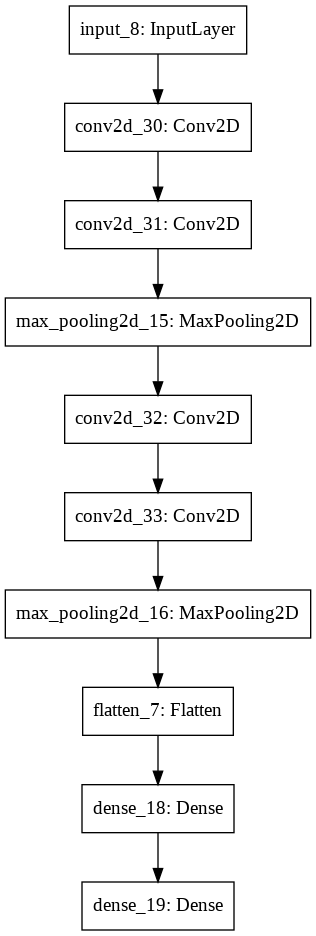

In [44]:
# Original
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),        
        layers.Conv2D(filters=32, kernel_size=3, activation="relu"), # Learn 2D Representations
        layers.Conv2D(filters=32, kernel_size=3, activation="relu"), # Learn 2D Representations
            
        layers.MaxPool2D(pool_size=2, strides=2), # Still learning 2D Representations
     
        #layers.BatchNormalization(),
        layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
     
        layers.MaxPool2D(pool_size=2, strides=2), # Still learning 2D Representations
     
        layers.Flatten(), # Flatten now!
        layers.Dense(512, activation="relu"),
       # layers.Dropout(0.2),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
keras.utils.plot_model(model)


In [45]:
history, score = train_and_evaluate(model)



Epoch 1/40
176/176 [==============================] - 3s 16ms/step - loss: 1.6479 - accuracy: 0.3996 - val_loss: 1.3755 - val_accuracy: 0.5024
Epoch 2/40
176/176 [==============================] - 2s 14ms/step - loss: 1.2536 - accuracy: 0.5508 - val_loss: 1.1190 - val_accuracy: 0.5920
Epoch 3/40
176/176 [==============================] - 2s 14ms/step - loss: 1.0694 - accuracy: 0.6242 - val_loss: 1.0102 - val_accuracy: 0.6406
Epoch 4/40
176/176 [==============================] - 2s 14ms/step - loss: 0.9473 - accuracy: 0.6666 - val_loss: 0.9345 - val_accuracy: 0.6766
Epoch 5/40
176/176 [==============================] - 2s 14ms/step - loss: 0.8512 - accuracy: 0.7025 - val_loss: 0.9125 - val_accuracy: 0.6884
Epoch 6/40
176/176 [==============================] - 2s 14ms/step - loss: 0.7611 - accuracy: 0.7340 - val_loss: 0.8624 - val_accuracy: 0.7046
Epoch 7/40
176/176 [==============================] - 3s 14ms/step - loss: 0.6857 - accuracy: 0.7612 - val_loss: 0.8310 - val_accuracy: 0.7202

vanilla Test loss: 2.418109655380249
vanilla Test accuracy: 0.7181000113487244


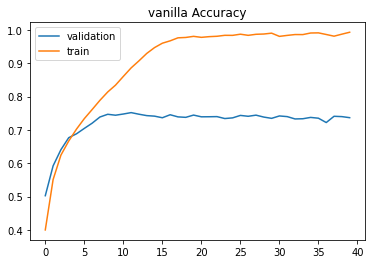

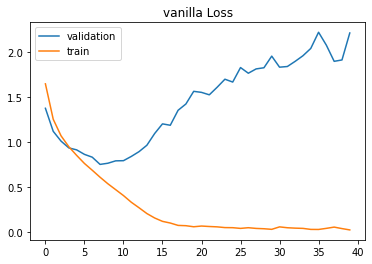

In [46]:
print_and_plot(history, score, "vanilla")

# Data Augmentation Model 1

In [47]:
history12, score12 = train_and_evaluate_aug(model)

Epoch 1/40
196/196 [==============================] - 28s 143ms/step - loss: 0.8741 - accuracy: 0.7217 - val_loss: 0.8170 - val_accuracy: 0.7340
Epoch 2/40
196/196 [==============================] - 27s 138ms/step - loss: 0.7291 - accuracy: 0.7514 - val_loss: 0.7940 - val_accuracy: 0.7406
Epoch 3/40
196/196 [==============================] - 27s 140ms/step - loss: 0.6818 - accuracy: 0.7650 - val_loss: 0.7186 - val_accuracy: 0.7568
Epoch 4/40
196/196 [==============================] - 27s 139ms/step - loss: 0.6501 - accuracy: 0.7757 - val_loss: 0.7395 - val_accuracy: 0.7577
Epoch 5/40
196/196 [==============================] - 27s 138ms/step - loss: 0.6198 - accuracy: 0.7842 - val_loss: 0.7037 - val_accuracy: 0.7670
Epoch 6/40
196/196 [==============================] - 27s 138ms/step - loss: 0.6034 - accuracy: 0.7923 - val_loss: 0.6714 - val_accuracy: 0.7776
Epoch 7/40
196/196 [==============================] - 27s 136ms/step - loss: 0.5806 - accuracy: 0.8012 - val_loss: 0.6881 - val_ac

vanilla_aug Test loss: 0.6268736124038696
vanilla_aug Test accuracy: 0.8105000257492065


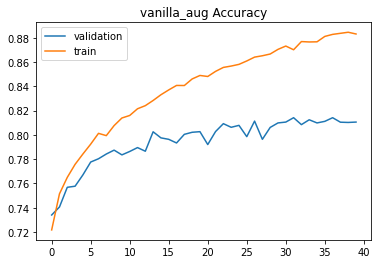

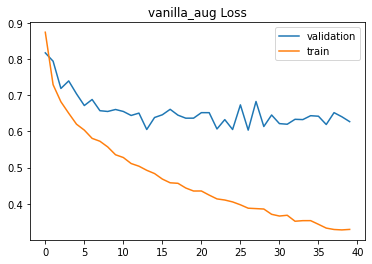

In [48]:
print_and_plot(history12, score12, "vanilla_aug")

# Model 2 with BN, Dropout and Regularizer

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)             

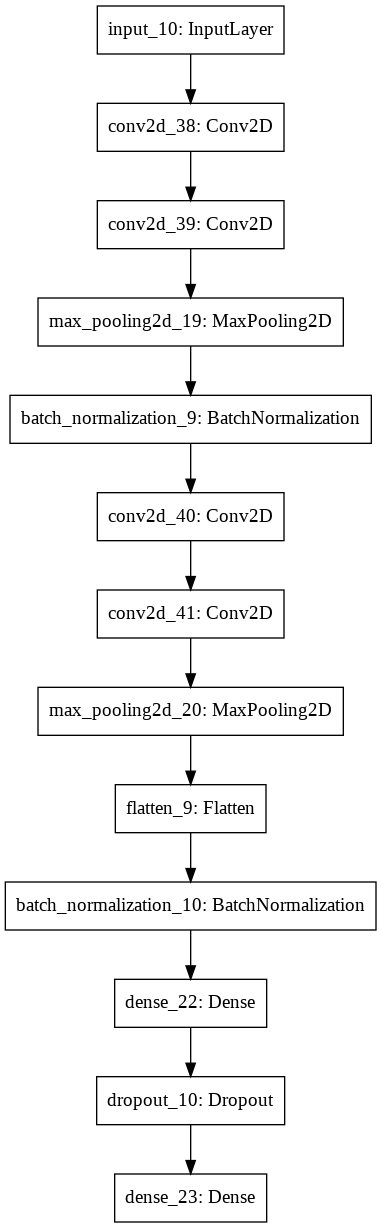

In [50]:
# Original v2
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),        
        layers.Conv2D(filters=32, kernel_size=3, activation="relu"), # Learn 2D Representations
        layers.Conv2D(filters=32, kernel_size=3, activation="relu"), # Learn 2D Representations
            
        layers.MaxPool2D(pool_size=2, strides=2), # Still learning 2D Representations
     
        layers.BatchNormalization(),
        layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
     
        layers.MaxPool2D(pool_size=2, strides=2), # Still learning 2D Representations
     
        layers.Flatten(), # Flatten now!
        layers.BatchNormalization(),
        layers.Dense(512, activation="relu",kernel_regularizer='l2'),
        layers.Dropout(0.4),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
keras.utils.plot_model(model2)


In [51]:
history21, score21 = train_and_evaluate(model2)

Epoch 1/40
176/176 [==============================] - 3s 16ms/step - loss: 4.6929 - accuracy: 0.4879 - val_loss: 4.5761 - val_accuracy: 0.1250
Epoch 2/40
176/176 [==============================] - 3s 15ms/step - loss: 1.4664 - accuracy: 0.6465 - val_loss: 5.3749 - val_accuracy: 0.1558
Epoch 3/40
176/176 [==============================] - 3s 15ms/step - loss: 1.1771 - accuracy: 0.6972 - val_loss: 2.2905 - val_accuracy: 0.3938
Epoch 4/40
176/176 [==============================] - 3s 15ms/step - loss: 1.1074 - accuracy: 0.7240 - val_loss: 1.3489 - val_accuracy: 0.6352
Epoch 5/40
176/176 [==============================] - 3s 15ms/step - loss: 1.0671 - accuracy: 0.7431 - val_loss: 1.2252 - val_accuracy: 0.6896
Epoch 6/40
176/176 [==============================] - 3s 15ms/step - loss: 1.0403 - accuracy: 0.7591 - val_loss: 1.2707 - val_accuracy: 0.6764
Epoch 7/40
176/176 [==============================] - 3s 15ms/step - loss: 1.0009 - accuracy: 0.7734 - val_loss: 1.1567 - val_accuracy: 0.7256

bn_drop_vanilla Test loss: 1.4558470249176025
bn_drop_vanilla Test accuracy: 0.7279999852180481


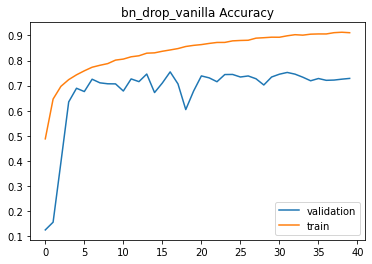

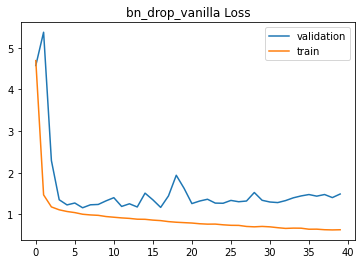

In [52]:
print_and_plot(history21, score21, "bn_drop_vanilla")

# AugMentation Data on model 2 with BN(),Dropout() 

In [54]:
history22, score22 = train_and_evaluate_aug(model2)

Epoch 1/40
196/196 [==============================] - 28s 144ms/step - loss: 0.8418 - accuracy: 0.8116 - val_loss: 0.9241 - val_accuracy: 0.7877
Epoch 2/40
196/196 [==============================] - 27s 139ms/step - loss: 0.8253 - accuracy: 0.8153 - val_loss: 0.9208 - val_accuracy: 0.7899
Epoch 3/40
196/196 [==============================] - 27s 140ms/step - loss: 0.8157 - accuracy: 0.8174 - val_loss: 0.8605 - val_accuracy: 0.8033
Epoch 4/40
196/196 [==============================] - 27s 138ms/step - loss: 0.8134 - accuracy: 0.8171 - val_loss: 1.0013 - val_accuracy: 0.7671
Epoch 5/40
196/196 [==============================] - 27s 137ms/step - loss: 0.8160 - accuracy: 0.8162 - val_loss: 0.9164 - val_accuracy: 0.7887
Epoch 6/40
196/196 [==============================] - 26s 135ms/step - loss: 0.8101 - accuracy: 0.8168 - val_loss: 0.9248 - val_accuracy: 0.7938
Epoch 7/40
196/196 [==============================] - 26s 135ms/step - loss: 0.8104 - accuracy: 0.8183 - val_loss: 0.8959 - val_ac

BN_DROP_vanilla_aug Test loss: 0.8116468191146851
BN_DROP_vanilla_aug Test accuracy: 0.8141000270843506


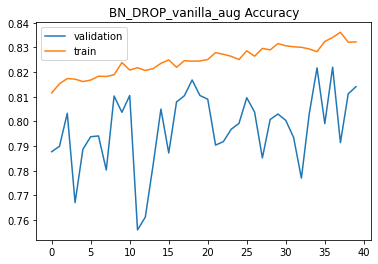

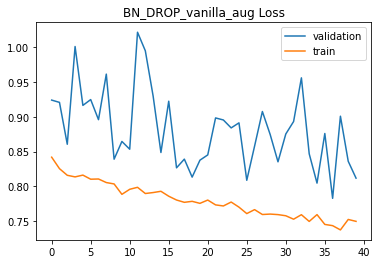

In [55]:
print_and_plot(history22, score22, "BN_DROP_vanilla_aug")

# Comments
Αρχικά έφτιαξα ένα μοντελό χωρίς χρήση κάποιου batchNormalization ή Dropout layer και χωρίς χρήση regularization kernel σε Dense layer, και συγκρίνα τα αποτελέσματα με και χωρίς DataAugmentation. Παρατηρείται ότι υπάρχει βελτίωση τόσο ως προς το test accuracy όσο και προς το train καθως επίσης και στο loss όπως φαίνεται και από τα γράφηματα. Συγκερκιμένα το **valid loss** απο **2.4** πέφτει στο **0.62** ενω το accuracy από **0.71** πηγαίνει στο **0.81**. Παρόλαυτα παρατηρείται το φαινόμενο του overfitting και στις δυο περιπτώσεις για έναν αριθμό εποχών μεγαλυτερό του 6 περιπου, κρατώντας το batch_size στο *256*.

Επείτα τροποποιήσα το αρχικό μοντέλο (*Model 2*) χρησιμοποιώντας ΒΝ ,Dropout και regularization kernel στα Dense layer τα αποτελέσματα είναι ελαφρώς βελτιωμένα σε σχέση με την του αρχικού μοντέλου πάνω στα αρχικά δεδομένα , αλλά και οπως διαπιστώνουμε το gap μεταξυ του train και test (valid), από το γράφημα, είναι μικρότερο και οι καμπύλες έχουν γίνει πιο ομαλές, ενώ παρατηρείται ότι συγκλίνουν πιο γρήγορα (ειδίκα το train set). 


Συνοψήζοντας,  χρησιμοποιώντας την μέθοδο του DataAugmentation βλέπουμε πώς υπάρχει  βελτίωση στο accuracy & το loss του test set (valid ) και για τα δυο μοντέλα ενώ η χρήση regularization dropout ή batch normalization βοηθάει στην πιο εύκολη και γρήγορη εκπαίδευση ενός μοντέλου ειδικά όταν είναι αρκετά βαθύ ή πλατύ.